In [1]:
import runpy
import uvicorn
from threading import Thread

<font color = Darkblue size = 8 face = bold> __Call Tracking: Bayesian AB Testing__
<br>
    
<font color = Darkblue size = 6 face = bold> __DS223 Marketing Analytics__
<br>
    
<font color = Darkblue size = 4 face = bold> __Professor: Karen Hovhannisyan__
<br>   
    
<font color = Darkblue size = 4 face = bold> December 13, 2023

<font color = Darkblue size = 10 face = bold> __Presenting to you our team__
<br>
<br>
    
<font color = Black size = 5 face = bold> Project | Product / Project Manager: Anush Aghinyan
<br>   
<font color = Black size = 5 face = bold> Database Developer: Anahit Navoyan  
<br>
<font color = Black size = 5 face = bold> API Developer: Mher Movsisyan
<br>       
<font color = Black size = 5 face = bold> Data Scientists: Yeva Avetisyan, Naira Barseghyan  

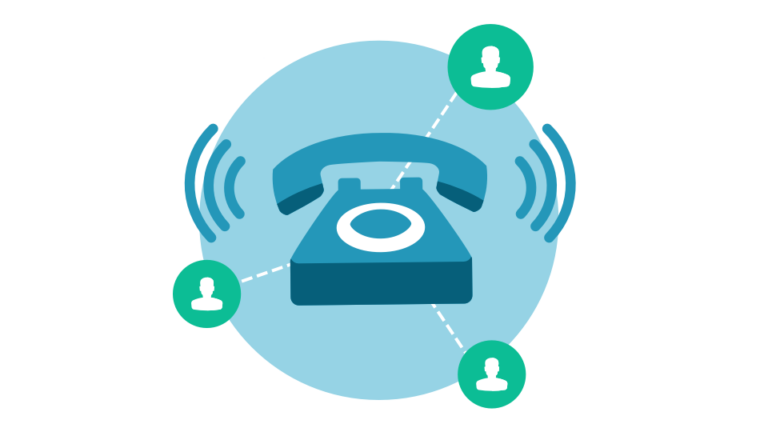

<font color = Darkblue size = 10 face = bold> __Objective__
<br>
<br>
    
<font color = Black size = 6 face = bold> Maximize the effectiveness of ad campaigns by identifying which ads generate more calls.

<font color = Darkblue size = 10 face = bold> __Description__
<br>
<br>
    
<font color = Black size = 6 face = bold> Our project uses Bayesian AB Testing for call tracking. It assigns different phone numbers to different ads and analyzes the amount of calls each ad receives. Based on the gained insights, the algorithm chooses the most successful ad. 

<font color = Darkblue size = 10 face = bold> __Package Functionality__

<font color = Darkblue size = 10 face = bold> __1. Database Shchema__

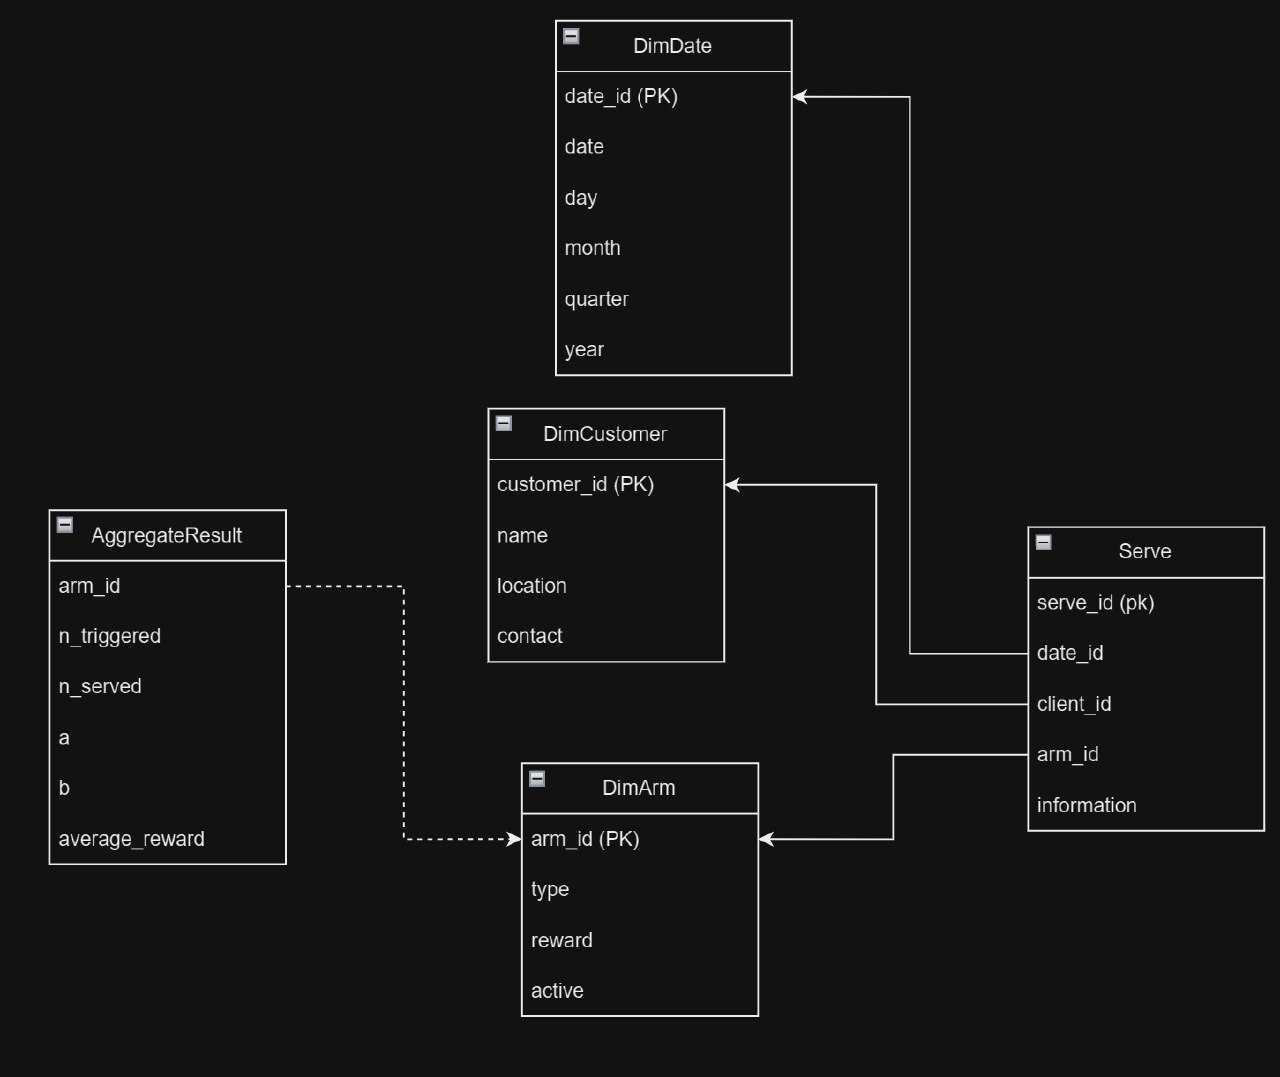

In [4]:
!pip install bayesian_ab_testing==1.1.2
import bayesian_ab_testing

  Using cached SQLAlchemy-2.0.23-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.6 kB)
Using cached SQLAlchemy-2.0.23-cp311-cp311-macosx_11_0_arm64.whl (2.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.22
    Uninstalling SQLAlchemy-2.0.22:
      Successfully uninstalled SQLAlchemy-2.0.22


<font color = Darkblue size = 10 face = bold> __2. Data Generation__

In [4]:
from bayesian_ab_testing.data_preparation import generate_arm, generate_customer, generate_date, generate_serve

arm = generate_arm(4)
cust = generate_customer(2)
date = generate_date(10)
serve = generate_serve(12, date_id=date["date_id"], customer_id=cust["customer_id"], arm_id=arm["arm_id"], p=0.5)

cust

{'customer_id': 2,
 'name': 'Hannah Smith',
 'location': '85982 William Stream',
 'contact': '(656)895-8207'}

<font color = Darkblue size = 10 face = bold> __3. Linking to Database__

In [5]:
from bayesian_ab_testing.data_preparation import SqlHandler

cust_tbl = SqlHandler("DimCustomer")
cust_tbl.insert_one(**cust)
cust_tbl.select_one(cust["customer_id"])

2023-12-13 11:43:23,151 - sql_interactions.py - get_table_columns - INFO - (the list of columns: ['customer_id', 'name', 'location', 'contact']) - line: 77
INFO:sql_interactions.py:the list of columns: ['customer_id', 'name', 'location', 'contact']


{'customer_id': 2,
 'name': 'Hannah Smith',
 'location': '85982 William Stream',
 'contact': '(656)895-8207'}

<font color = Darkblue size = 10 face = bold> __4. Running the Algorithm__

In [6]:
from bayesian_ab_testing.models.TS_Bernoulli import ThompsonAlgo, ThompsonArm
from bayesian_ab_testing.api import cnxn

a = ThompsonArm(2, cnxn, type="Instagram", reward=3, customer_id=0)
b = ThompsonArm(3, cnxn, type="Facebook", reward=4, customer_id=0)
c = ThompsonArm(4, cnxn, type="TikTok", reward=1, customer_id=0)

c = ThompsonAlgo(cnxn, customer_id=0)
c.get_best_arm()

2023-12-13 11:43:25,466 - sql_interactions.py - update_table - INFO - (Rows updated: 1) - line: 209
INFO:sql_interactions.py:Rows updated: 1


{'serve_id': 0,
 'date_id': 0,
 'customer_id': 0,
 'arm_id': 4,
 'information': None,
 'result': None}

<font color = Darkblue size = 10 face = bold> __5. To the API__
<br> 

<font color = Black size = 6 face = bold> Now the API developer will show the API endpoints and how it all connects.

<font color = Darkblue size = 10 face = bold> __6. Application Scenarios__

<font color = Darkblue size = 10 face = bold>

Example 1
    
<font color = black size = 5 face = bold> __Background:__
<br>
Our customer is a marketing manager for a local restaurant. The restaurant has been in business for several years. They are exploring new ways to increase customer engagement and foot traffic. Traditional marketing methods like distributing fliers and investing in billboard advertisements have been successful in the past, but they want to determine which channel is more effective in driving customer calls and reservations.

<font color = black size = 5 face = bold> __Objective:__ 
<br>
The goal is to optimize the marketing budget and focus on the channel that generates more calls, ultimately leading to increased reservations and revenue.

<font color = black size = 5 face = bold> __Implementation:__
    
<br>
Step 1: A/B Testing Setup
<br>   
Step 2: Call Tracking and Analysis
<br>
Step 3: Evaluation and Decision Making
<br>
Step 4: Decision and Future Strategy

<font color = Darkblue size = 10 face = bold>

Example 2
    
<font color = black size = 5 face = bold> __Background:__
<br>
Our customer is a marketing director for an upscale spa and wellness center. The spa has a loyal customer base, and they want to introduce a set of new premium services to their customers. To optimize the marketing strategy, they want to determine the effectiveness of promoting these services through email and direct mail campaigns targeted at existing customers.

<font color = black size = 5 face = bold> __Objective:__
<br>
The goal is to identify the most effective communication channel for promoting new services to customers, considering both cost effectiveness and customer engagement.

<font color = black size = 5 face = bold> __Implementation:__
    
<br>
Step 1: A/B Testing Setup
<br>   
Step 2: Call Tracking and Analysis
<br>
Step 3: Evaluation and Decision Making
<br>
Step 4: Decision and Future Strategy

<font color = Darkblue size = 10 face = bold> __Thank you!__